<a href="https://colab.research.google.com/github/Vamsi24-coder/Predictive_Analytics/blob/house_price_prediction/Predictive_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

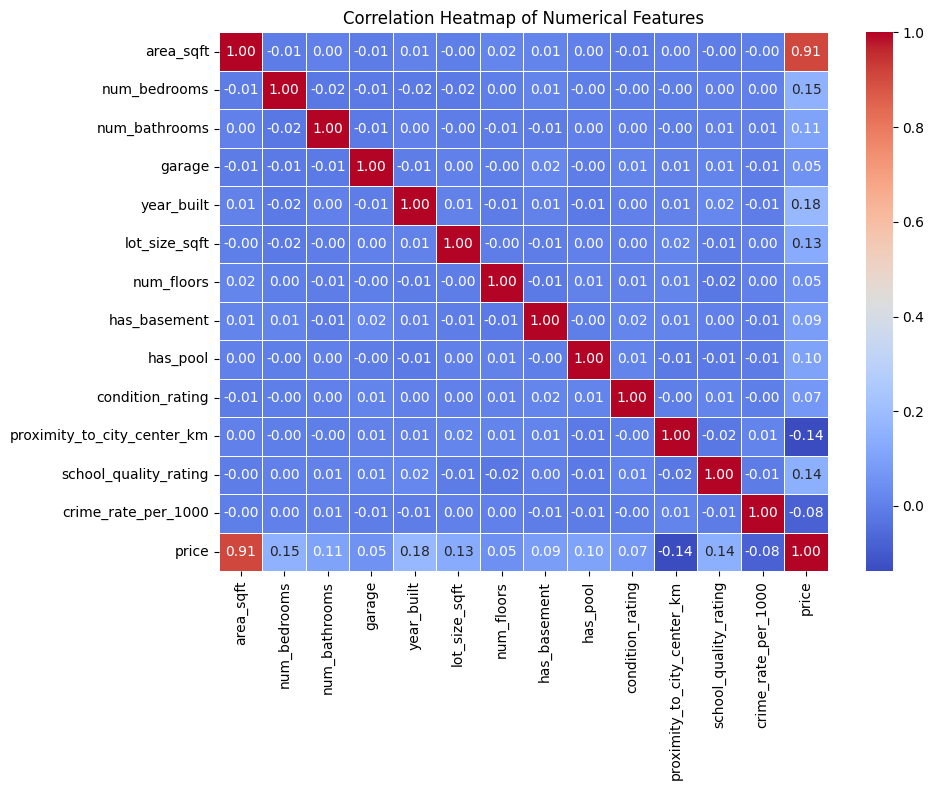

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (replace with your file path or DataFrame)
df = pd.read_csv('house_price.csv')  # or use your DataFrame directly

# Select only numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()
%matplotlib inline


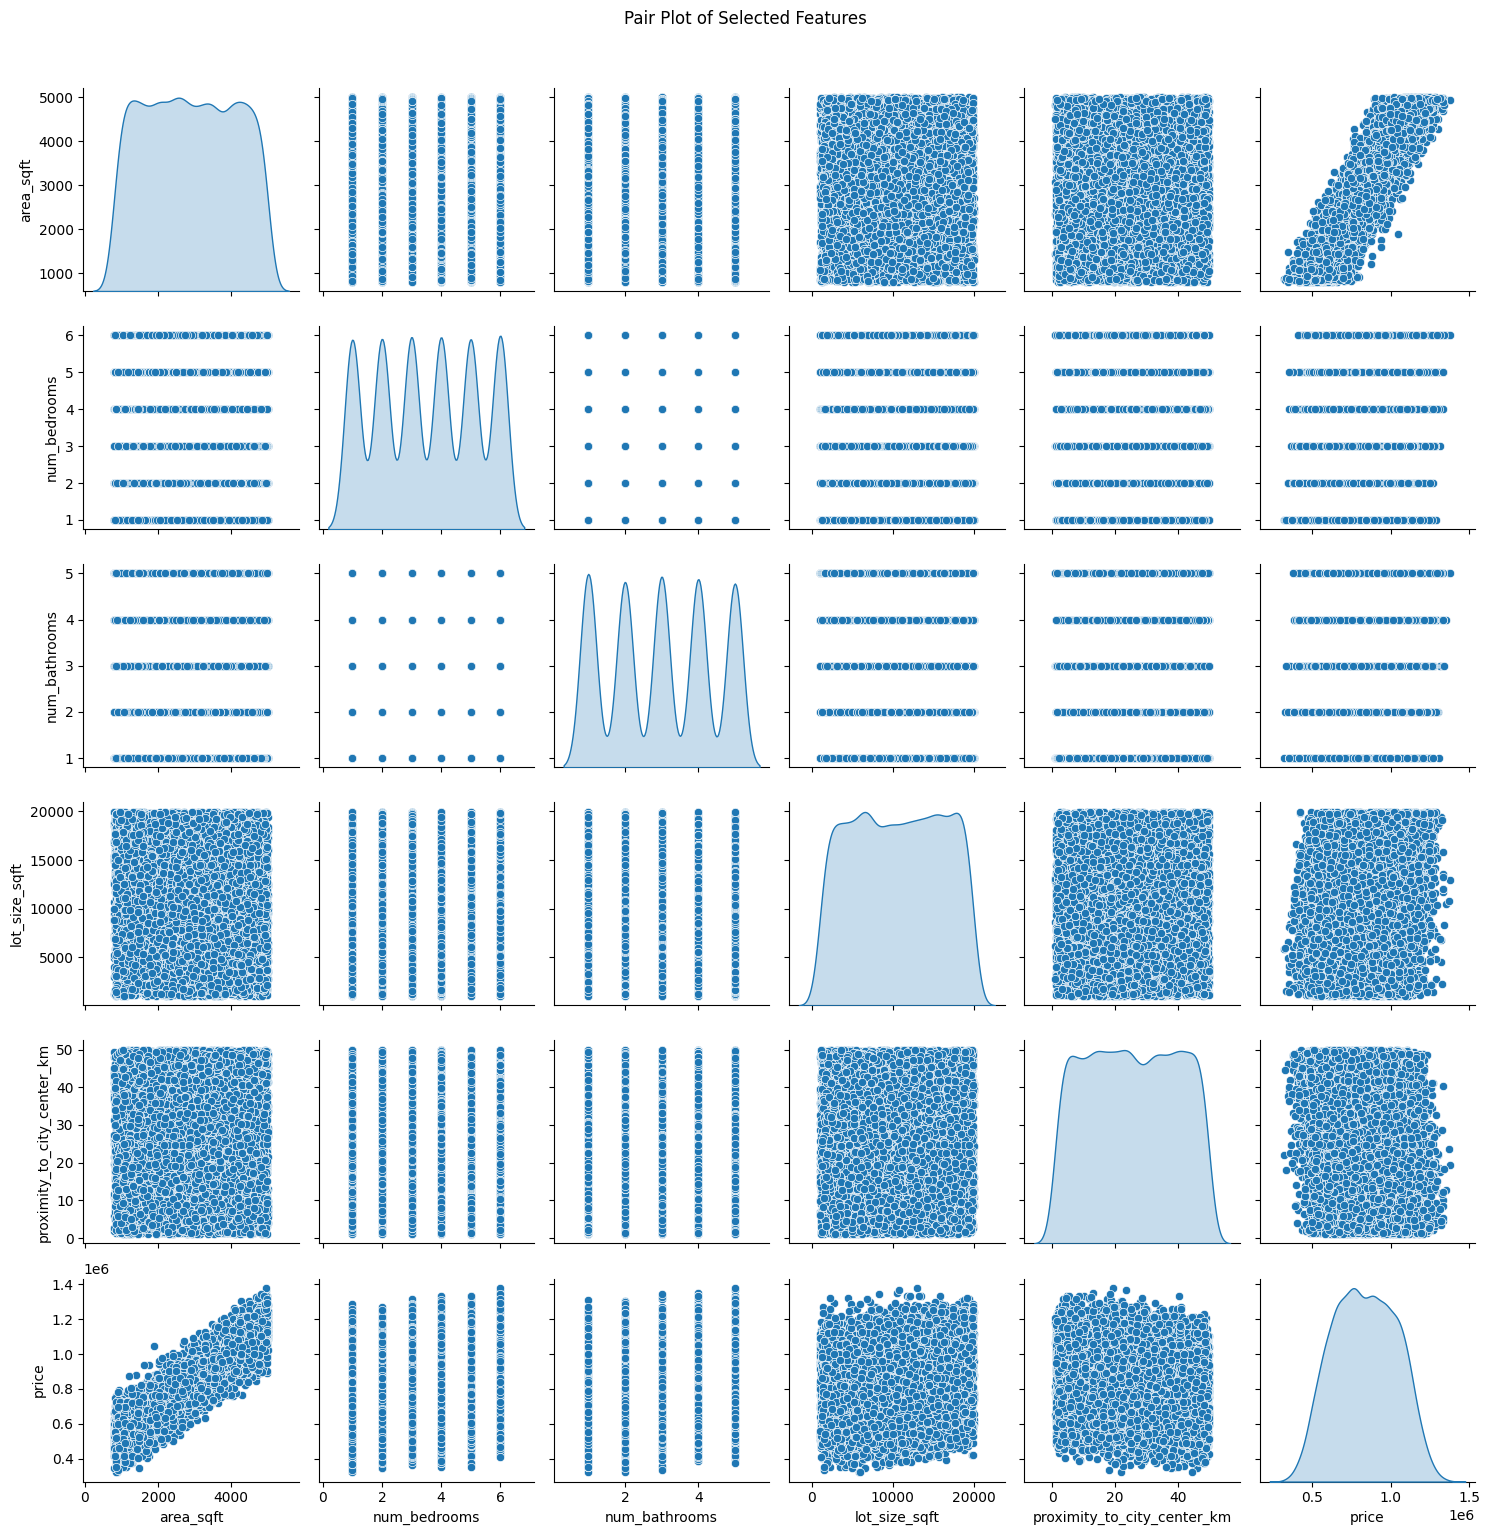

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset (replace with your actual path or DataFrame)
df = pd.read_csv('house_price.csv')

# Select a few important numerical features for the pair plot
selected_features = ['area_sqft', 'num_bedrooms', 'num_bathrooms',
                     'lot_size_sqft', 'proximity_to_city_center_km', 'price']

# Create the pair plot
sns.pairplot(df[selected_features], diag_kind='kde')


plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.tight_layout()
plt.show()


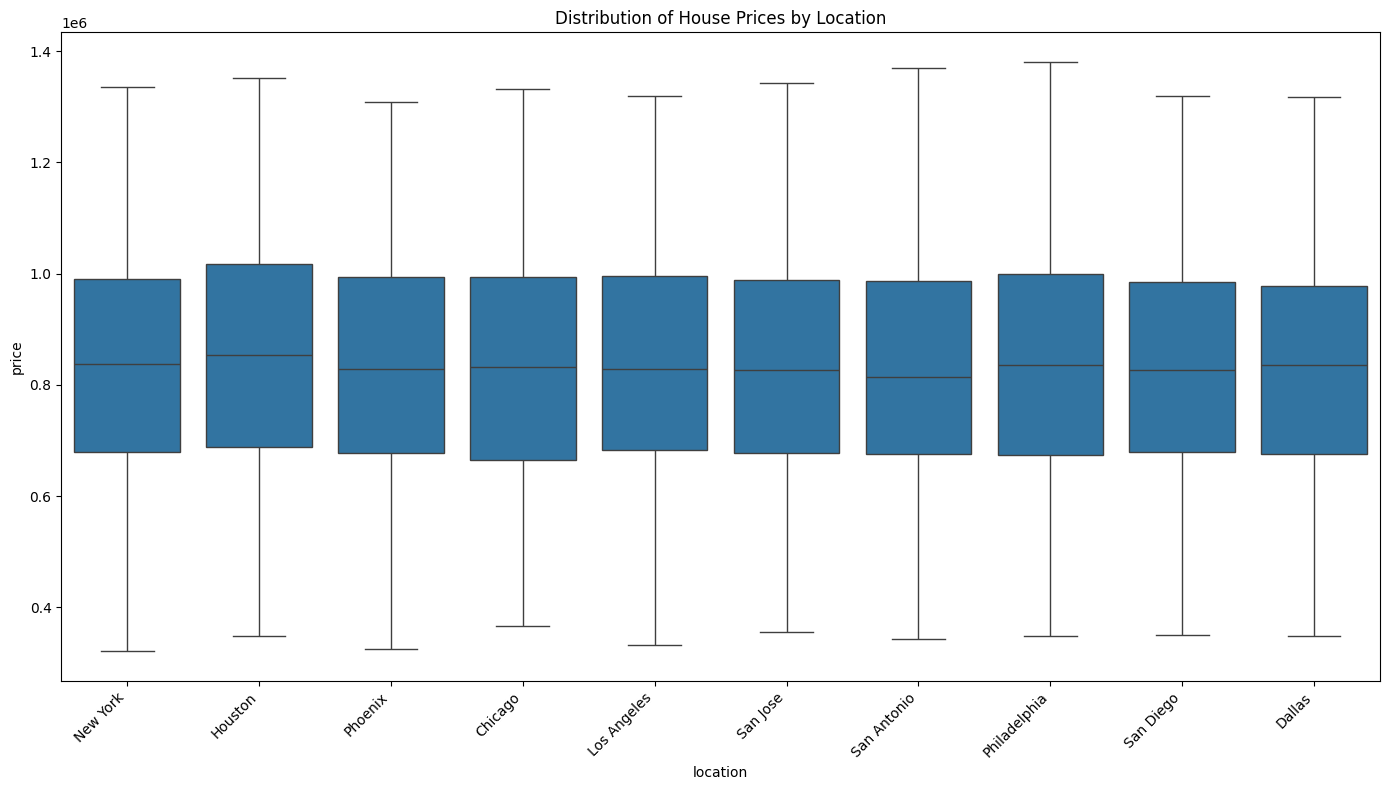

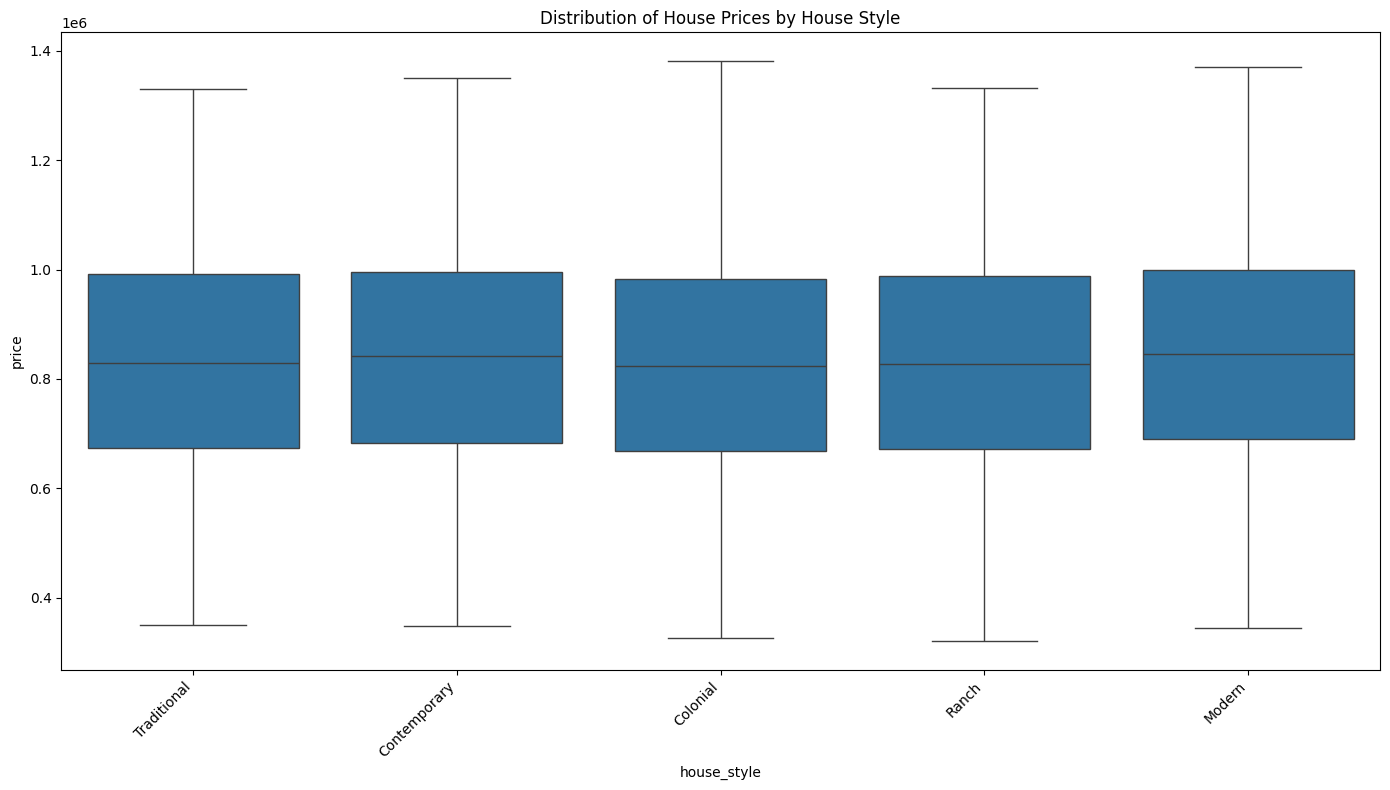

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('house_price.csv')

# ── 1. Box plot: Price vs Location ────────────────────────────────────────────
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='location', y='price')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of House Prices by Location')
plt.tight_layout()
plt.show()

# ── 2. Box plot: Price vs House Style ─────────────────────────────────────────
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='house_style', y='price')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of House Prices by House Style')
plt.tight_layout()
plt.show()


/tmp/ipython-input-4-245591859.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], bins=50, kde=True, color='skyblue')


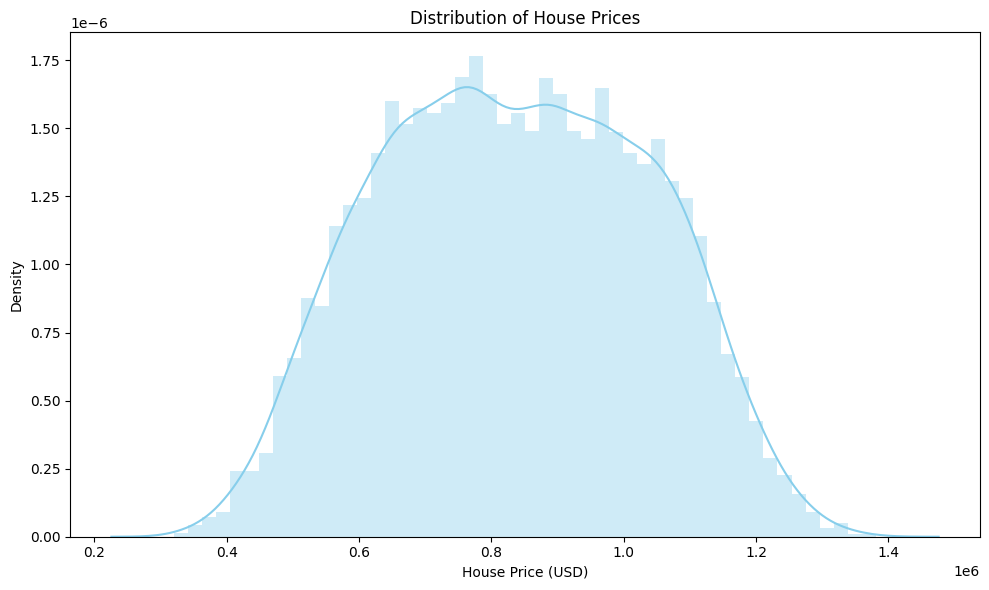

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('house_price.csv')

# Use distplot instead of histplot
plt.figure(figsize=(10, 6))
sns.distplot(df['price'], bins=50, kde=True, color='skyblue')

plt.title('Distribution of House Prices')
plt.xlabel('House Price (USD)')
plt.ylabel('Density')
plt.tight_layout()
plt.show()


/tmp/ipython-input-5-566344379.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=feat_imp_df.head(20), x='Importance', y='Feature', palette='viridis')


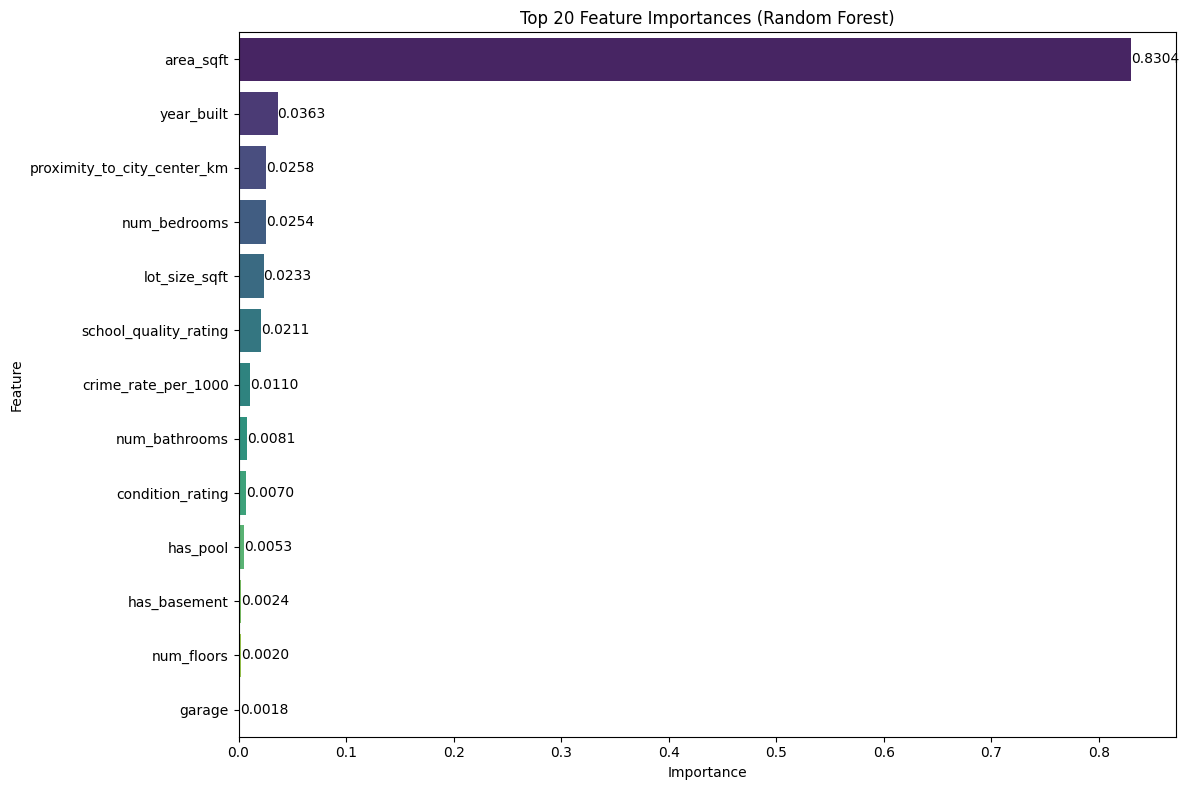

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# ───────────────────────────────────────
# Load your dataset
df = pd.read_csv('house_price.csv')

# Encode categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

# Drop object (non-numeric) columns (if any remain accidentally)
df_encoded = df_encoded.select_dtypes(include=[np.number])

# Drop rows where 'price' is missing
df_encoded = df_encoded.dropna(subset=['price'])

# Separate features and target
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Replace infinite values in NumPy (efficient)
X = np.where(np.isfinite(X), X, np.nan)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42
)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Feature importance
importances = model.feature_importances_
feature_names = df_encoded.drop('price', axis=1).columns

# Prepare for plotting
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=feat_imp_df.head(20), x='Importance', y='Feature', palette='viridis')
plt.title('Top 20 Feature Importances (Random Forest)')
for container in ax.containers:
    ax.bar_label(container, fmt='%.4f', label_type='edge')
plt.tight_layout()
plt.show()


✅ Model trained – test RMSE: 34,627 USD


<Figure size 1200x600 with 0 Axes>

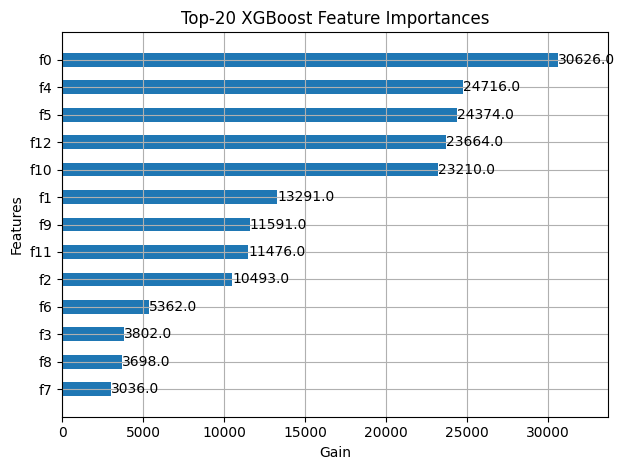

100%|===================| 7991/8000 [15:41<00:01]       

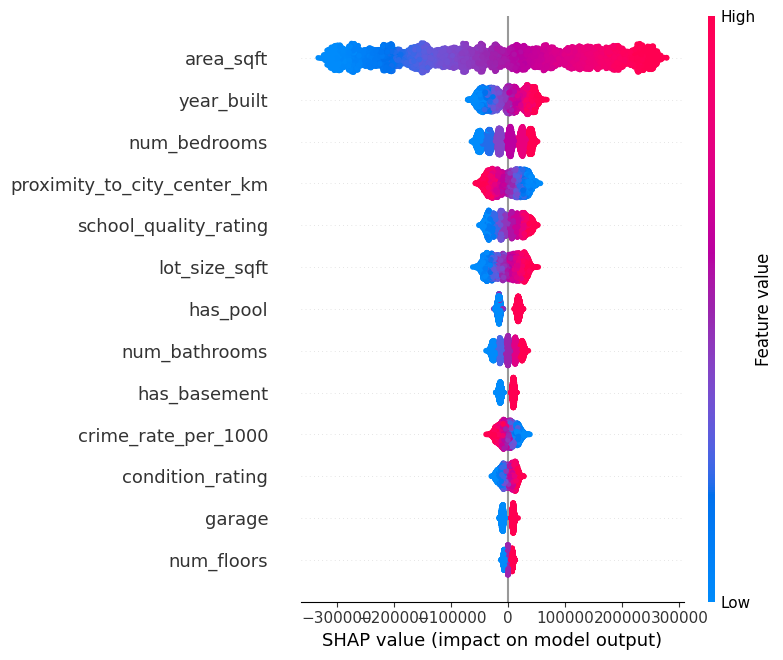

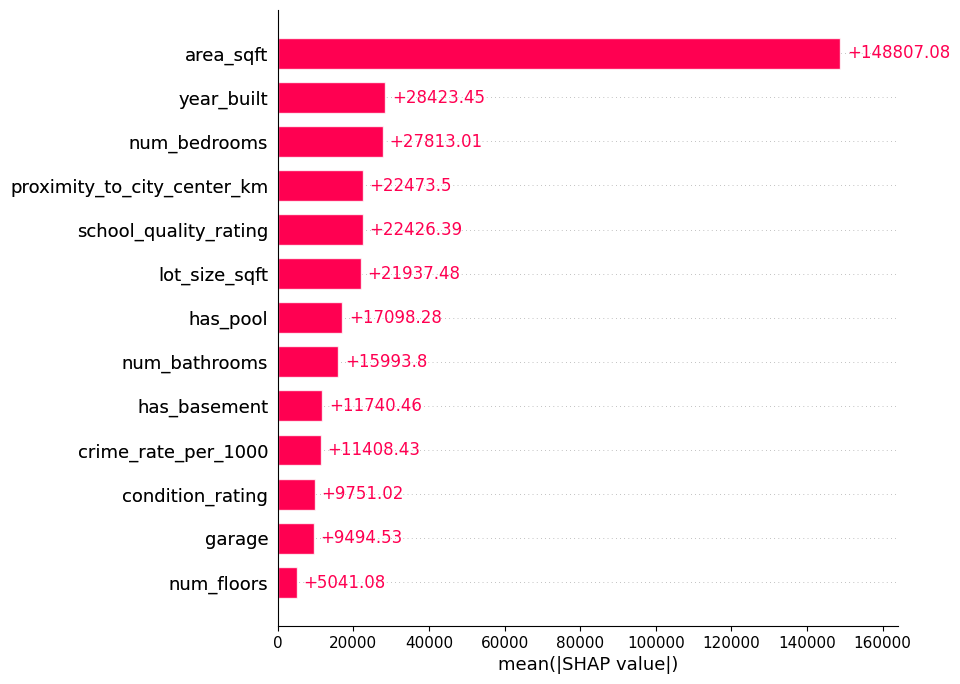

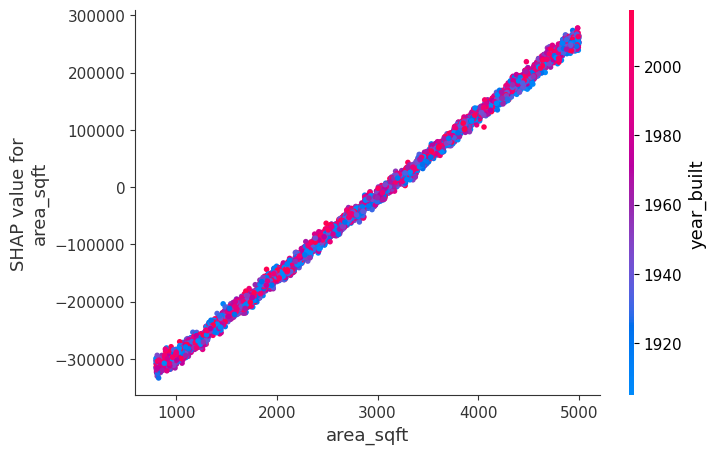

In [3]:
# ╔════════════════════════════════════════════════════════════╗
# ║        HOUSE PRICE PREDICTION + SHAP INSIGHTS (GPU)       ║
# ╚════════════════════════════════════════════════════════════╝

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap, xgboost

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from math import sqrt

# SHAP init
shap.initjs()

# ╭───────────────────────────────╮
# │ Load and preprocess dataset  │
# ╰───────────────────────────────╯
DATA_PATH = '/content/house_price.csv'   # ✅ Change if needed
df = pd.read_csv(DATA_PATH)

# Drop rows without price
df = df.dropna(subset=['price'])

# One-hot encode categorical features
df_enc = pd.get_dummies(df, drop_first=True)

# Keep only numeric, remove infinities
df_enc = df_enc.select_dtypes(include=[np.number])
df_enc = df_enc.replace([np.inf, -np.inf], np.nan)

# Split features and target
X = df_enc.drop('price', axis=1)
y = df_enc['price']

# Impute missing values
X = SimpleImputer(strategy='mean').fit_transform(X)

# ╭────────────────────────────────────────────╮
# │ Train-test split                           │
# ╰────────────────────────────────────────────╯
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ╭────────────────────────────────────────────╮
# │ XGBoost GPU Training                        │
# ╰────────────────────────────────────────────╯
params = {
    'device': 'cuda',             # ✅ Updated GPU syntax
    'tree_method': 'hist',
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 8,
    'learning_rate': 0.05,
    'n_estimators': 1000,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42,
}

model = xgboost.XGBRegressor(**params)
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

# Calculate RMSE
mse = mean_squared_error(y_test, model.predict(X_test))
rmse = sqrt(mse)
print(f'✅ Model trained – test RMSE: {rmse:,.0f} USD')

# ╭────────────────────────────────────────────╮
# │ Feature Importance – Native XGBoost        │
# ╰────────────────────────────────────────────╯
plt.figure(figsize=(12, 6))
xgboost.plot_importance(model, max_num_features=20, height=0.5, xlabel='Gain')
plt.title('Top‑20 XGBoost Feature Importances')
plt.tight_layout()
plt.show()

# ╭────────────────────────────────────────────╮
# │ SHAP Explanations                          │
# ╰────────────────────────────────────────────╯
feature_names = df_enc.drop('price', axis=1).columns
explainer = shap.Explainer(model, X_train, feature_names=feature_names)

# Sample 8000 rows for SHAP calculation
sample_idx = np.random.choice(X_train.shape[0], size=min(8000, X_train.shape[0]), replace=False)
shap_values = explainer(X_train[sample_idx])

# ── SHAP Global Summary (Beeswarm) ──
shap.summary_plot(shap_values, features=X_train[sample_idx], feature_names=feature_names)

# ── SHAP Bar plot: average absolute SHAP value per feature ──
shap.plots.bar(shap_values, max_display=20)

# ── SHAP Dependence Plot (Top Feature) ──
top_feat = feature_names[np.argmax(np.abs(shap_values.values).mean(axis=0))]
shap.dependence_plot(top_feat, shap_values.values, X_train[sample_idx], feature_names=feature_names)
